# Exercise 3 | Part 1: One-vs-all

In [1]:
import sys
# needed modules
path_to_modules = '../../algorithms_in_python/week_4/ex3/'
sys.path.append(path_to_modules)
from predictOneVsAll import predictOneVsAll
from lrGradient import lrGradient
from oneVsAll import oneVsAll
from lrCostFunction import lrCostFunction
from displayData import displayData

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Setup the parameters you will use for this part of the exercise
input_layer_size  = 400 # 20x20 Input Images of Digits
num_labels = 10          # 10 labels, from 1 to 10
                          # (note that we have mapped "0" to label 10)

##  Part 1: Loading and Visualizing Data 
  We start the exercise by first loading and visualizing the dataset.
  You will be working with a dataset that contains handwritten digits.

Loading and Visualizing Data ...

(100, 400)


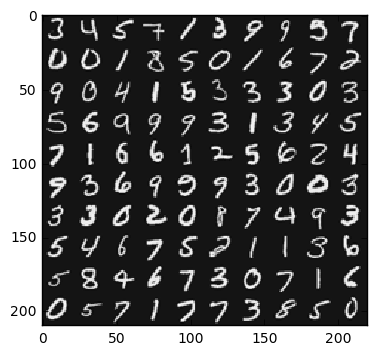

In [3]:
# Load Training Data
print('Loading and Visualizing Data ...\n')


X = np.loadtxt(path_to_modules + 'MNIST_DATA.csv', delimiter =",")
m,_ = X.shape

y = np.loadtxt(path_to_modules + 'MNIST_DATA_LABEL.csv', delimiter =",").reshape(m, 1)


#since python indexes start with 0 and matlab's ones start with 10, we replace all 10 by 0
y = np.where(y == 10, 0, y)

#Randomly select 100 data points to display
rand_indices = np.random.choice(m, 100)

displayData(X[rand_indices])

plt.show(block=False)

## Part 2a: Vectorize Logistic Regression 
  In this part of the exercise, you will reuse your logistic regression
  code from the last exercise. You task here is to make sure that your
  regularized logistic regression implementation is vectorized. After
  that, you will implement one-vs-all classification for the handwritten
  digit dataset.

In [4]:
# Test case for lrCostFunction
print('\nTesting lrCostFunction() with regularization')

theta_t = np.array([[-2], [-1], [1], [2]])

data =  np.arange(1, 16).reshape(3, 5).T

X_t = np.c_[np.ones((5,1)), data/10]

y_t =  (np.array([[1], [0], [1], [0], [1]]) >= 0.5) * 1

lambda_t = 3

J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t), lrGradient(theta_t, X_t, y_t, lambda_t, flattenResult=False)

print('\nCost: f\n', J)
print('Expected cost: 2.534819\n')
print('Gradients:\n')
print(' f \n', grad)
print('Expected gradients:\n')
print(' 0.146561\n -0.548558\n 0.724722\n 1.398003\n')


Testing lrCostFunction() with regularization

Cost: f
 2.53481939611
Expected cost: 2.534819

Gradients:

 f 
 [[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]]
Expected gradients:

 0.146561
 -0.548558
 0.724722
 1.398003



## Part 2b: One-vs-All Training 

In [5]:
print('\nTraining One-vs-All Logistic Regression...\n')

reg_lambda = 0.1
all_theta = oneVsAll(X, y, num_labels, reg_lambda)


Training One-vs-All Logistic Regression...

optimizing theta 0
optimizing theta 1
optimizing theta 2
optimizing theta 3
optimizing theta 4
optimizing theta 5
optimizing theta 6
optimizing theta 7
optimizing theta 8
optimizing theta 9


## Part 3: Predict for One-Vs-All

[ 3.  4.  5.  7.  1.  3.  9.  9.  5.  7.  0.  0.  1.  8.  5.  0.  1.  6.
  7.  2.  9.  0.  4.  1.  5.  3.  3.  3.  0.  3.  5.  6.  9.  9.  9.  3.
  1.  3.  4.  5.  7.  1.  6.  6.  1.  2.  5.  6.  2.  4.  9.  3.  6.  9.
  9.  9.  3.  0.  0.  3.  3.  3.  0.  2.  0.  8.  7.  4.  9.  3.  5.  4.
  6.  7.  5.  2.  1.  1.  3.  6.  5.  8.  4.  6.  7.  3.  0.  7.  1.  6.
  0.  5.  7.  1.  7.  7.  3.  8.  5.  0.]
training Set Accuracy::  95.38 %

Displaying Example Image

(1, 400)


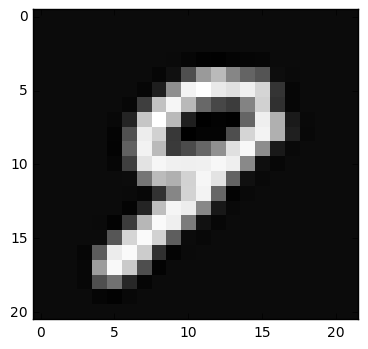

\one-vs-all classification for the handwritten digit dataset prediction:  [9]
Paused - press enter to continue, q to exit:a

Displaying Example Image

(1, 400)


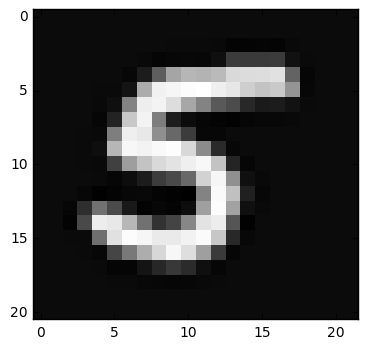

\one-vs-all classification for the handwritten digit dataset prediction:  [5]
Paused - press enter to continue, q to exit:a

Displaying Example Image

(1, 400)


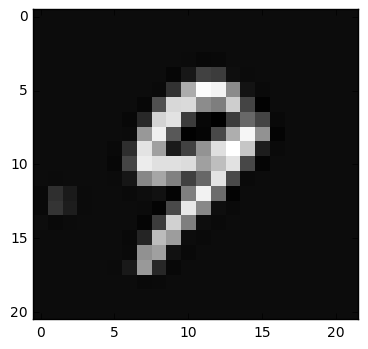

\one-vs-all classification for the handwritten digit dataset prediction:  [9]
Paused - press enter to continue, q to exit:q


In [6]:
#Compute accuracy on our training set

p = predictOneVsAll(all_theta, X)
y = y.reshape((m))

print(y[rand_indices])

print("training Set Accuracy:: ", np.multiply(np.mean((p == y).astype(int)), 100), '%')

#  To give you an idea of the network's output, you can also run
#  through the examples one at the a time to see what it is predicting.

#  Randomly permute examples
rand_indices = np.random.choice(m, 600)

for i in range(600):
    # Display 
    print('\nDisplaying Example Image\n')
    imageData = X[rand_indices[i]].reshape(400, 1).T
    displayData(imageData)
    plt.show(block=False)
    pred = predictOneVsAll(all_theta, imageData)
    print('\one-vs-all classification for the handwritten digit dataset prediction: ', pred)

    # Pause with quit option
    s = input('Paused - press enter to continue, q to exit:')
    if s == 'q':
      break